In [ ]:
#setup
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.model_selection import train_test_split
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv("steam-store-games/steam.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

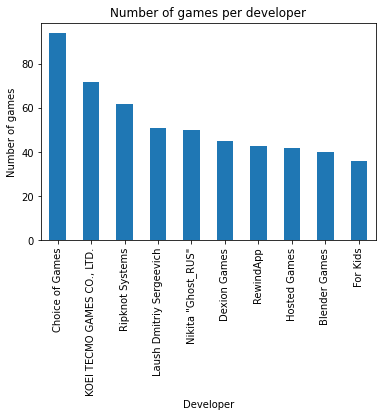

In [ ]:
devs = dataset['developer'].value_counts().head(10)
fig1, ax1 = plt.subplots()
devs.plot(kind="bar")

plt.title('Number of games per developer')
plt.ylabel('Number of games')
plt.xlabel('Developer')

plt.show()

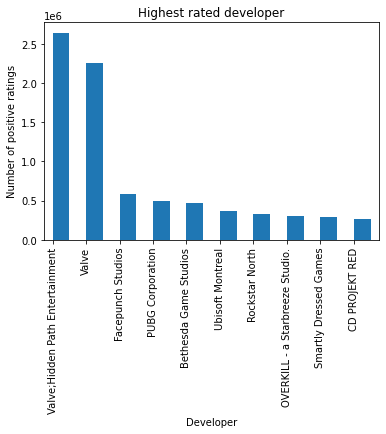

In [ ]:
dev_rating = dataset.groupby('developer')['positive_ratings'].sum()
dev_rating = dev_rating.sort_values(ascending=False).head(10)

fig1, ax1 = plt.subplots()
dev_rating.plot(kind="bar", ax=ax1, orientation='vertical', align=u'edge', )

plt.title('Highest rated developer')
plt.ylabel('Number of positive ratings')
plt.xlabel('Developer')


plt.show()

In [ ]:
#cleaning up data
dataset = dataset.drop(['developer', 'publisher', 'platforms', 'required_age', 'achievements', 'owners', 'price', 'median_playtime',], axis=1)
dataset = dataset.drop(dataset[dataset['english'] == 0].index).reset_index(drop=True)
dataset = dataset.drop('english', axis=1)
dataset = dataset.drop(dataset[dataset['positive_ratings'] <= 500].index).reset_index(drop=True)
def split_into_list(row):
    x = str(row).split(';')
    x.sort()
    return x

dataset['categories'] = dataset['categories'].apply(split_into_list)
dataset['steamspy_tags'] = dataset['steamspy_tags'].apply(split_into_list)
dataset['genres'] = dataset['genres'].apply(split_into_list)
dataset

,appid,name,release_date,categories,genres,steamspy_tags,positive_ratings,negative_ratings,average_playtime
0,10,Counter-Strike,2000-11-01,"[Local Multi-Player, Multi-player, Online Mult...",[Action],"[Action, FPS, Multiplayer]",124534,3339,17612
1,20,Team Fortress Classic,1999-04-01,"[Local Multi-Player, Multi-player, Online Mult...",[Action],"[Action, FPS, Multiplayer]",3318,633,277
2,30,Day of Defeat,2003-05-01,"[Multi-player, Valve Anti-Cheat enabled]",[Action],"[FPS, Multiplayer, World War II]",3416,398,187
3,40,Deathmatch Classic,2001-06-01,"[Local Multi-Player, Multi-player, Online Mult...",[Action],"[Action, FPS, Multiplayer]",1273,267,258
4,50,Half-Life: Opposing Force,1999-11-01,"[Multi-player, Single-player, Valve Anti-Cheat...",[Action],"[Action, FPS, Sci-fi]",5250,288,624
...,...,...,...,...,...,...,...,...,...
3234,1025580,Vainglory,2019-02-13,"[Cross-Platform Multiplayer, In-App Purchases,...","[Early Access, Free to Play, Strategy]","[Early Access, Free to Play, MOBA]",1211,739,0
3235,1031480,東方幕華祭 春雪篇 ～ Fantastic Danmaku Festival Part II,2019-03-18,"[Partial Controller Support, Single-player, St...",[Indie],"[Bullet Hell, Faith, Indie]",619,19,154
3236,1043180,Lovers of Aether,2019-04-01,"[Single-player, Steam Cloud]","[Casual, Indie, Simulation]","[Casual, Dating Sim, Psychological Horror]",651,29,12
3237,1046030,ISLANDERS,2019-04-04,"[Single-player, Steam Achievements, Steam Lead...","[Casual, Indie, Strategy]","[City Builder, Indie, Strategy]",1490,77,0


In [ ]:
null_check = dataset[dataset.isnull().any(axis=1)].head()
null_check

,appid,name,release_date,categories,genres,steamspy_tags,positive_ratings,negative_ratings,average_playtime


In [ ]:
#cant one hot encode the data but i found this cool thing that does the exacts same thing
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# binarize labels

expandedLabelData = mlb.fit_transform(dataset["categories"])
labelClasses = mlb.classes_
categories = pd.DataFrame(expandedLabelData, columns=labelClasses)

expandedLabelData = mlb.fit_transform(dataset["genres"])
labelClasses = mlb.classes_
genres = pd.DataFrame(expandedLabelData, columns=labelClasses)

expandedLabelData = mlb.fit_transform(dataset["steamspy_tags"])
labelClasses = mlb.classes_
steam_tags = pd.DataFrame(expandedLabelData, columns=labelClasses).drop('Co-op', axis=1)

encodedLabels = steam_tags.join(categories, how='outer')
encodedLabels
#all 3239 games that we are using "one hot encoded" 
dataset2 = dataset
dataset = dataset.drop(['categories', 'genres', 'steamspy_tags'], axis=1)
dataset = dataset.join(encodedLabels, how='outer')
dataset



,appid,name,release_date,positive_ratings,negative_ratings,average_playtime,1980s,2D,2D Fighter,3D,3D Platformer,4X,6DOF,Action,Action RPG,Adventure,Agriculture,Aliens,America,Animation & Modeling,Anime,Arcade,Arena Shooter,Assassin,Atmospheric,Base-Building,Baseball,Basketball,Batman,Battle Royale,Beat 'em up,Beautiful,Board Game,Bowling,Building,Bullet Hell,Bullet Time,Capitalism,Card Game,Cartoon,Casual,Cats,Character Action Game,Character Customization,Chess,Choices Matter,Choose Your Own Adventure,City Builder,Classic,Clicker,...,Twin Stick Shooter,Typing,Underwater,Utilities,VR,VR Only,Vampire,Video Production,Villain Protagonist,Violent,Visual Novel,Walking Simulator,War,Warhammer 40K,Web Publishing,Western,Word Game,World War I,World War II,Wrestling,Zombies,Captions available,Co-op,Commentary available,Cross-Platform Multiplayer,Full controller support,In-App Purchases,Includes Source SDK,Includes level editor,Local Co-op,Local Multi-Player,MMO,Mods,Mods (require HL2),Multi-player,Online Co-op,Online Multi-Player,Partial Controller Support,Shared/Split Screen,Single-player,Stats,Steam Achievements,Steam Cloud,Steam Leaderboards,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,VR Support,Valve Anti-Cheat enabled
0,10,Counter-Strike,2000-11-01,124534,3339,17612,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,20,Team Fortress Classic,1999-04-01,3318,633,277,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,30,Day of Defeat,2003-05-01,3416,398,187,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,40,Deathmatch Classic,2001-06-01,1273,267,258,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,50,Half-Life: Opposing Force,1999-11-01,5250,288,624,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,1025580,Vainglory,2019-02-13,1211,739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3235,1031480,東方幕華祭 春雪篇 ～ Fantastic Danmaku Festival Part II,2019-03-18,619,19,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0
3236,1043180,Lovers of Aether,2019-04-01,651,29,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3237,1046030,ISLANDERS,2019-04-04,1490,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0


In [ ]:
#knn model
dataset_prepared = dataset.drop(['appid', 'name', 'release_date', 'positive_ratings', 'negative_ratings', 'average_playtime'], axis=1)

from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(dataset_prepared)

distances, indices = nbrs.kneighbors(dataset_prepared)
print(nbrs.get_params())


{'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 6, 'p': 2, 'radius': 1.0}


In [ ]:
#helper functions
def get_index_from_name(name):
    return dataset[dataset["name"]==name].index.tolist()[0]


all_game_names = list(dataset.name.values)
all_game_tags = list(dataset2.steamspy_tags.values)

def list_id_from_partial_name(partial):
    for name in all_game_names:
        if partial in name:
            print(name,all_game_names.index(name))

def findTagByName(name):
    ind = dataset2[dataset2["name"]==name].index.tolist()[0]
    return ','.join(all_game_tags[ind])

def get_id_from_partial_name(partial):
    for name in all_game_names:
        if partial in name:
            print("Selected Game: " + name + "\tTags:" + findTagByName(name)  + "\n")
            print("Similar Names: ")
            list_id_from_partial_name(partial)
            print("\nReccomendations: ")
            return all_game_names.index(name)


def print_similar_games(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(dataset.loc[id]["name"])
            #print(distances.flatten()[id])
    if query:
        found_id = get_id_from_partial_name(query)
        for id in indices[found_id][1:]:
            print(dataset.loc[id]["name"],dataset2.loc[id]["steamspy_tags"])
            #print(distances.flatten()[id])



In [ ]:
#Test the feature
print_similar_games(query='Hollow Knight')

#print_similar_games(id=1312)

Selected Game: Hollow Knight	Tags:Difficult,Great Soundtrack,Metroidvania

Similar Names: 
Hollow Knight 1865

Reccomendations: 
La-Mulana ['Difficult', 'Metroidvania', 'Platformer']
Transistor ['Female Protagonist', 'Great Soundtrack', 'Indie']
The Impossible Game ['Difficult', 'Great Soundtrack', 'Indie']
To the Moon ['Great Soundtrack', 'Indie', 'Story Rich']
Shantae: Half-Genie Hero ['Female Protagonist', 'Great Soundtrack', 'Platformer']


In [ ]:
#cosine similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#dataset setup
dataset_cs = pd.read_csv("steam-store-games/steam.csv")
dataset_cs = dataset_cs.drop(['developer', 'publisher', 'platforms', 'required_age', 'achievements', 'owners', 'price', 'median_playtime', 'negative_ratings', 'average_playtime'], axis=1)
dataset_cs = dataset_cs.drop(dataset_cs[dataset_cs['english'] == 0].index).reset_index(drop=True)
dataset_cs = dataset_cs.drop('english', axis=1)
dataset_cs = dataset_cs.drop(dataset_cs[dataset_cs['positive_ratings'] <= 500].index).reset_index(drop=True)
dataset_cs = dataset_cs.drop('positive_ratings', axis=1)

# Separating tags with a space
def globalization(strok:str):
    return strok.replace(';', ' ')

# Removing duplicate tags
def del_rep(strok:str):
    spl_strok = strok.split()
    return ' '.join(sorted(set(spl_strok), key=spl_strok.index))

# Converting to lower case
def to_low(strok:str):
    return strok.lower()


# Separating tags with a space
dataset_cs['categories'] = dataset_cs['categories'].apply(globalization)
dataset_cs['steamspy_tags'] = dataset_cs['steamspy_tags'].apply(globalization)

# Combining genres and tags
dataset_cs['tags'] = dataset_cs['categories'] + ' ' + dataset_cs['steamspy_tags']

# Removing duplicate tags
dataset_cs['tags'] = dataset_cs['tags'].apply(del_rep)

# Convert strings to lowercase and concatenate into one column
dataset_cs['alls'] = dataset_cs['name'].copy().apply(to_low)
dataset_cs['alls'] += ' ' + dataset_cs['tags'].apply(to_low)

# Convert a collection of text documents to a matrix of token counts
count_vec = CountVectorizer(stop_words='english')
count_matrix = count_vec.fit_transform(dataset_cs['alls'])

# Compute cosine similarity
cosine_sim = cosine_similarity(count_matrix, count_matrix)
 

In [ ]:
all_game_names = list(dataset_cs.name.values)

def list_id_from_partial_name(partial):
    for name in all_game_names:
        if partial in name:
            print(name,all_game_names.index(name))

def get_id_from_partial_name(partial):
    for name in all_game_names:
        if partial in name:
            print("Selected Game: " + name + '\n')
            print("Similar Names: ")
            list_id_from_partial_name(partial)
            print('\n')
            return name


def get_rec(nam:str, cosine):
    print("Cosine Similarity Model")
    ind = dataset_cs[dataset_cs['name'] == get_id_from_partial_name(nam)].index.to_list()[0]
    
    cos_scor = list(enumerate(cosine[ind]))
    
    cos_scor = sorted(cos_scor, key=lambda x: x[1], reverse=True)
    cos_scor = cos_scor[1:6]
    print("Reccomened Games: ")
    for i in cos_scor:
        print(dataset['name'].loc[i[0]] + " -- Similarity: " + str(i[1]))
    9
    

In [ ]:
get_rec('Skyrim', cosine_sim)

Cosine Similarity Model
Selected Game: The Elder Scrolls V: Skyrim

Similar Names: 
The Elder Scrolls V: Skyrim 414
The Elder Scrolls V: Skyrim Special Edition 2461
The Elder Scrolls V: Skyrim VR 2839


Reccomened Games: 
The Elder Scrolls V: Skyrim Special Edition -- Similarity: 0.8003267306650416
ELEX -- Similarity: 0.7559289460184543
Kingdoms of Amalur: Reckoning™ -- Similarity: 0.7302967433402214
My Time At Portia -- Similarity: 0.7302967433402214
FINAL FANTASY® XIII-2 -- Similarity: 0.7222222222222224


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=479b1211-26fe-468c-a449-6adba86090d0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>